Based on Harvard-CS109a-FA18 lec4 prep

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn import linear_model


In [4]:
df_adv = pd.read_csv('data/Advertising.csv')`

In [19]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
df_adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data_x = df_adv.TV[5:13].values
data_y = df_adv.sales[5:13].values

In [8]:
x = np.linspace(0,300)

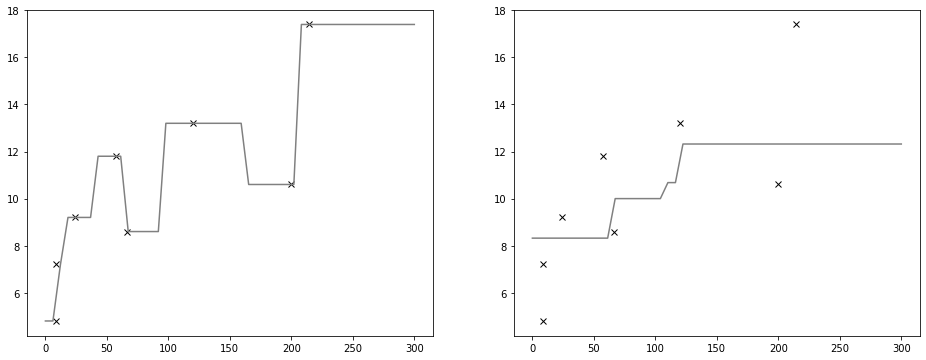

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

for ax, n_neighbors in zip(axs, [1, 5]):
    ax.plot(data_x, data_y, 'kx', label='data')
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    y_ = knn.fit(data_x.reshape(-1,1), data_y.reshape(-1,1)).predict(x.reshape(-1,1))
    ax.plot(x,y_, label ="k="+str(n_neighbors), color='grey')#, alpha=0.6)



In [16]:
data_x = df_adv.TV[5:93].values
data_y = df_adv.sales[5:93].values

In [48]:
data_x = df_adv.TV.values[:, None]
data_y = df_adv.sales

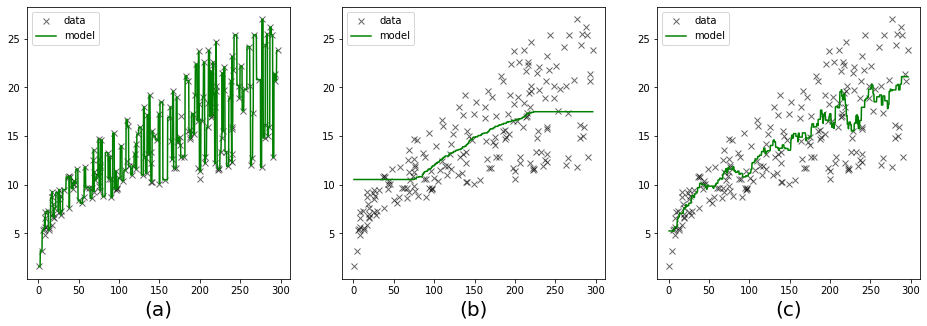

In [55]:
x = np.linspace(np.min(data_x), np.max(data_x), 1000)[:, None]

fig, axs = plt.subplots(ncols=3, figsize=(16, 5))

for ax, n_neighbors, label in zip(axs, [1, 100, 10], 'abc'):
    ax.plot(data_x, data_y, 'kx', label='data', alpha=.6)
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    y_ = knn.fit(data_x, data_y).predict(x)
    ax.plot(x,y_, label = "model", color='g')
    ax.legend()
    ax.set_xlabel(f'({label})', fontsize=20)
plt.savefig('knn_for_quiz.png')

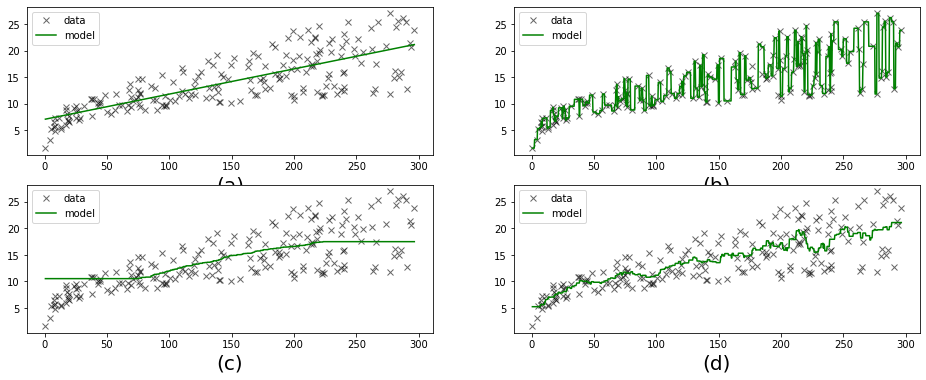

In [54]:
x = np.linspace(np.min(data_x), np.max(data_x), 1000)[:, None]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 6))

for ax, n_neighbors, label in zip(axs.ravel(), ['lin', 1, 100, 10], 'abcd'):
    ax.plot(data_x, data_y, 'kx', label='data', alpha=.6)
    if n_neighbors == 'lin':
        y_ = linear_model.LinearRegression().fit(data_x, data_y).predict(x)
    else:
        knn = neighbors.KNeighborsRegressor(n_neighbors)
        y_ = knn.fit(data_x, data_y).predict(x)
    ax.plot(x,y_, label = "model", color='g')
    ax.legend()
    ax.set_xlabel(f'({label})', fontsize=20)
plt.savefig('knn_for_quiz_2.png')

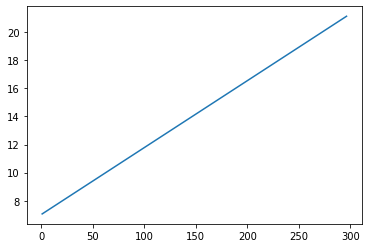

In [51]:
y_ = linear_model.LinearRegression().fit(data_x, data_y).predict(x)
plt.plot(x, y_)